# Chapter 3: Statistical Experiments and Significance Testing

`This chapter focuses on designing experiments to confirm or reject a hypothesis.`

Statistical inference is the intention of applying statistical results from an experiment, with a limited set of data, to a larger population or process.

Below is the classical statistical inference pipeline:

1. Formulate hypothesis
2. Design experiment
3. Collect data
4. Inference/conclusions

## A/B Testing

An A/B test is an experiment with two groups to establish which of two treatments, products, procedures, or the like is superior. One group is often the pre-existing group, or control group, while the other is the treatment group. A typical hypothesis is that a new treatment is better than the control.

**Key Terms for A/B Testing**

Treatment
- something (drug, price, web headline) to which a subject is exposed

Treatment group
- A group of subjects exposed to a specific treatment

Control group
- A group of subjects exposed to no (or standard) treatment

Randomization
- The process of randomly assigning subjects to treatments

Subjects
- The items (web visitors, patients, etc.) that are exposed to treatments

Test statistic
- The metric used to measure the effect of the treatment

**Key Ideas**
- Identifying the correct way to hypothesize what you're testing
- Identify your subjects and success metric ahead of time
- Make sure you randomize subjects
- Make sure you receive permission from human subjects if the experiment has moral and ethical components

## Hypothesis Tests

Hypothesis tests, or *significance tests*, help you learn whether random chance might be responsible for an observed effect.

**Key Terms for Hypothesis Tests**

Null hypothesis
- The hypothesis that chance is to blame

Alternative hypothesis
- Counterpoint to the null (what you hope to prove)

One-way test
- Hypothesis test that counts chance results only in one direction

Two-way test
- Hypothesis test that counts chance results in two directions

**Key Ideas**
- Statistical hypothesis testing was invented to protect researchers from being fooled by random chance. 
- Properly designed A/B tests will have an observed difference between A and B must be due to either:
    1. Random chance in assignment of subjects
    2. A true difference between A and B

**Null Hypothesis**

Our baseline assumption is that the treatments are equivalent, and any difference between the groups is due to chance. This is called the *null hypothesis*. 

Our hope is to prove the null hypothesis is wrong and show that the outcomes for groups A and B are more different than what chance might produce.

One way to do this is through a random sampling procedure, where we shuffle together the results from groups A and B and then repeatedly deal out the data in groups of similar sizes, then observe how often we get a difference as extreme as the observed difference. The combined shuffled results from groups A and B, and the procedure of resampling from them, holds the null hypothesis of groups A and B being equivalent and interchangeable and is termed the *null model*. 

**Alternative Hypothesis**

Hypothesis tests also have an alternative hypothesis, which is the opposite of the null hypothesis. Together, the null and alternative hypotheses must account for all possibilities. 

Examples:
- Null = "no difference between the means of group A and group B; Alternative = "A is different from B" (could be bigger or smaller)
- Null = A < B; Alternative = A > B
- Null = "B is not X% greater than A; Alternative = "B is X% greater than A"

**One-Way versus Two-Way Hypothesis Tests**

*One-Way Test*

You want to have a *directional* alternative hypothesis where extreme chance results are only in one direction that count toward the p-value. This is called a one-way (or one-tail) hypothesis test. This protects you from being fooled by chance in the other direction, because you won't be stickign with A unless B proves definitively better.

*Two-Way Test*

Two-way tests will protect you from being fooled by chance in either direction, where the alternative hypothesis is *bidirectional*. This means that extreme chance results in either direction count toward the p-value.

*Practically...*

A one-tail hypothesis test often fits the nature of A/B decision making. A decision is required, one option is the default ground truth unless the other option proves better.

**Key Ideas**
- A null hypothesis is a logical construct embodying the notion that nothing special happened, and any effect you observe is due to random chance.
- The hypothesis test assumes the null hypothesis is true, creates a "null model" (a probability model), and tests whether the effect you observe is a reasonable outcome of that model.

## Resampling

Resampling means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. It can also be used to assess and improve teh accuracy of some machine-learning models (e.g., the predictions from decision tree models built on multiple bootstrapped data sets can be averaged in a process known as *bagging*)

Two main resampling procedures:
1. Bootstrap - used to assess the reliability of an estimate
2. Permutation tests - used to test hypotheses, typically involving two or more groups

**Key Terms for Resampling**

Permutation test
- The procedure of combining two or more samples together and randomly reallocating the observations to resamples
- Synonyms: Randomization test, random permutation test, exact test

Resampling
- Drawing additional samples ("resamples") from an observed data set

With or without replacement
- In sampling, whether or not an item is returned to the sample before the next draw

**Permutation Test**

- Permutation procedures involve two or more samples, typically the groups in an A/B or other hypothesis test
- Permute means to change the order of a set of values

The first step in a permutation test of a hypothesis is to combine the results from groups A and B (and, if used, C, D). The logic here is that the treatments to which the groups were exposed do not differ. We then test that hypothesis by randomly drawing groups from this combined set and seeing how much they differ from one another. 

The permutation procedure is as follows:
1. Combine the results from the different groups into a single data set
2. Shuffle the combined data, randomly draw (without replacement) a sample of the same size as group A (clearly it will contain some data from the other groups)
3. From the remaining data, randomly draw (without replacement) a resample of the same size as group B
4. Do the same for groups C, D, and so on. You have now collected one set of resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.
6. Repeat the previous steps $R$ times to yield a permutation distribution of the test statistic.

Now look at the observed difference between groups and compare it to the set of permuted differences. If the observed difference lies well within the set of permuted differences, then you have not proven anything - the observed difference is within the range of what chance might produce. However, if the observed difference lies outside most of the permutation distribution, then we conclude that chance is *not* responsible. In other words, the difference is *statistically significant*. 

In [3]:
# Import required packages
from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [14]:
WEB_PAGE_DATA_CSV = '/Users/brian.v.nguyen/projects/practical_statistics_for_data_scientists/data/web_page_data.csv'
FOUR_SESSIONS_CSV = '/Users/brian.v.nguyen/projects/practical_statistics_for_data_scientists/data/four_sessions.csv'
CLICK_RATE_CSV = '/Users/brian.v.nguyen/projects/practical_statistics_for_data_scientists/data/click_rates.csv'
IMANISHI_CSV = '/Users/brian.v.nguyen/projects/practical_statistics_for_data_scientists/data/imanishi_data.csv'

In [19]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

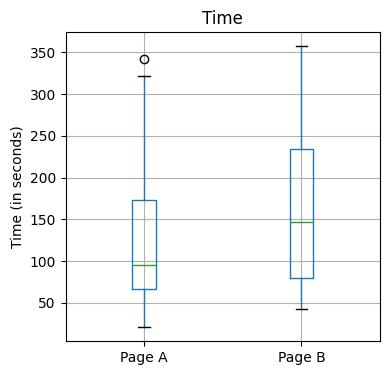

In [21]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4,4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

>The boxplot indicates that page B leads to longer sessions than page A.

Next, we'll filter the pandas data frame first by page and then determine the mean of the Time column:

In [28]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(f'Page B mean: {mean_b}')
print(f'Page A mean: {mean_a}')
print(f'Difference in means: {mean_b - mean_a}')

Page B mean: 162.0
Page A mean: 126.33333333333333
Difference in means: 35.66666666666667


>Page B has times that are greater than those of page A by 35.67 seconds, on average. The question is whether this difference is within the range of what random chance might produce, i.e., is statistically significant. One way to answer this is to apply a permutation test - combine all times together and then repeatedly shuffle and divide them into groups of 21 (recall that $na = 21$ for page A) and 15 ($nb = 15$ for page B)

In [40]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

-19.876190476190487


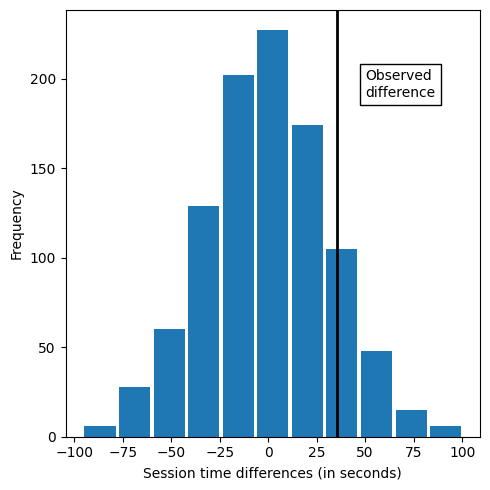

In [44]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histogram shows that mean difference in random permutations often exceeds the observed difference in times (the vertical line). For our results, this happens in 12.1% of the cases:

In [51]:
# convert perm_diffs to numpy array to avoid problems with some Python installations
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.121


This suggests that the observed differnce in time between page A and page B is well within the range of chance variation and thus is not statistically significant.

**Exhaustive and Bootstrap Permutation Tests**

In addition to the preceding random shuffling procedure, there are two variants of the permutation test:
- an exhaustive permutation test
- A bootstrap permutation test

**Exhaustive Permutation Test**

Instead of randomly shuffling and dividing the data, we figure out all the possible ways it could be divided. This is practical only for relatively small sample sizes. With a large number of repeated shufflings, the random permutation test results are also sometimes called *exact tests*, due to their statistical property of guaranteeing that the null model will not test as "significant" more than the alpha level of the test.

**Bootstrap Permutation Test**

In a bootstrap permutation test, the draws outlined in steps 2 and 3 of the random permutation test are made *with replacement* instead of without replacement. This way the resampling procedure models not just the random element in the assignment of treatment to subject but also the random element in the selection of subjects from a population. 

**Bottom Line**

Permutation tests are easy to code, interpret, and explain. They come much closer to a one-size-fits-all approach to inference. Data can be numeric or binary. Sample sizes can be the same or different. Assumptions about normally distributed data are not needed.

**Key Ideas**
- In a permutation test, multiple samples are combined and then shuffled.
- The shuffled values are then divided into resamples, and the statistic of interest is calculated.
- This process is then repeated, and the resampled statistic is tabulated.
- Comparing the observed value of the statistic to the resampled distribution allows you to judge whether an observed difference between samples might occur by chance.

## Statistical significance and p-Values

Statistical significance is how we measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce. If the result is beyond the realm of chance, it is said to be statistically significant.

**Key Terms for Statistical Significance and P-Values**

p-value
- Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results.

Alpha
- The probability threshold of "unusualness" that chance results must surpass for actual outcomes to be deemed statistically significant.

Type 1 error
- Mistakenly concluding an effect is real (when it is due to chance)

Type 2 error 
- Mistakenly concluding an effect is due to chance (when it is real)